In [12]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

%matplotlib inline


In [2]:
kenya = gpd.read_file('KenyapolygonKenyapolygon0856/')

In [3]:
kenya.head(10)

,id,country,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp,note,rpath,ISO3166_2,geometry
0,3495537,KEN,Baringo,None,Baringo,None,administrative,4,Q808201,None,2018-10-06 07:05:21,None,"3495537,192798,0",KE-01,"POLYGON ((35.5234935 0.0131824, 35.5242973 0.0..."
1,3338139,KEN,Bomet,None,Bomet,None,administrative,4,Q891952,None,2018-10-06 07:05:21,None,"3338139,192798,0",KE-02,"POLYGON ((35.0129447 -0.8826423, 35.0147147 -0..."
2,3495538,KEN,Bungoma,None,Bungoma,None,administrative,4,Q2928204,None,2018-10-06 07:05:21,None,"3495538,192798,0",KE-03,"POLYGON ((34.3624595 0.7754809, 34.3624954 0.7..."
3,3486321,KEN,Busia,None,Busia,None,administrative,4,Q1017519,None,2018-10-06 07:05:21,None,"3486321,192798,0",KE-04,(POLYGON ((33.91340705609331 0.097341725466683...
4,3495539,KEN,Elegeyo-Marakwet,None,Elegeyo-Marakwet,None,administrative,4,Q15216433,None,2018-10-06 07:05:21,None,"3495539,192798,0",KE-05,"POLYGON ((35.152288 1.1982292, 35.2011161 1.17..."
5,3495540,KEN,Embu County,Embu County,Embu,None,administrative,4,Q1335242,None,2018-10-06 07:05:21,None,"3495540,192798,0",KE-06,"POLYGON ((37.2678886 -0.7790657, 37.2769218 -0..."
6,3495541,KEN,Garissa County,Garissa County,Garissa,None,administrative,4,Q1494292,None,2018-10-06 07:05:21,None,"3495541,192798,0",KE-07,"POLYGON ((38.6583305 0.5066399, 38.6616874 0.5..."
7,3486017,KEN,Homa Bay,None,Homa Bay,None,administrative,4,Q1625834,None,2018-10-06 07:05:21,None,"3486017,192798,0",KE-08,"(POLYGON ((34.026025 -0.7571272, 34.0277416 -0..."
8,3495542,KEN,Isiolo County,Isiolo County,Isiolo,None,administrative,4,Q1499046,None,2018-10-06 07:05:21,None,"3495542,192798,0",KE-09,"POLYGON ((36.8651176 0.571032, 36.8673148 0.57..."
9,3486020,KEN,Kajiado County,Kajiado County,Kajiado,None,administrative,4,Q285072,None,2018-10-06 07:05:21,None,"3486020,192798,0",KE-10,"POLYGON ((36.0007377 -2.0945564, 36.0015311 -2..."


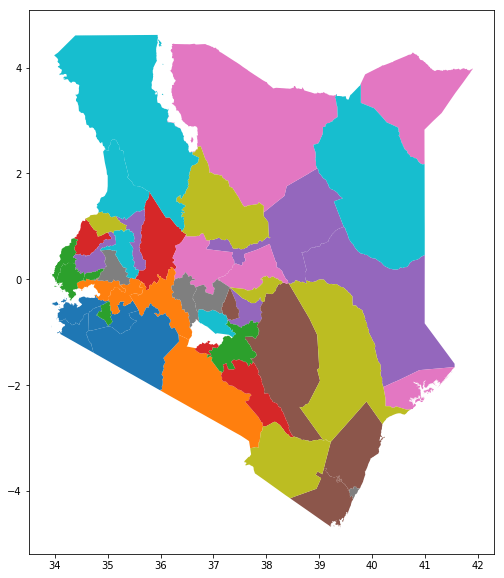

In [69]:
kenya.plot(column='id', categorical=True, figsize=(14,10))

In [70]:
papua = gpd.read_file('NewGuineaBoundaryshapefileNewGuineaBoundaryshapefile4371/')

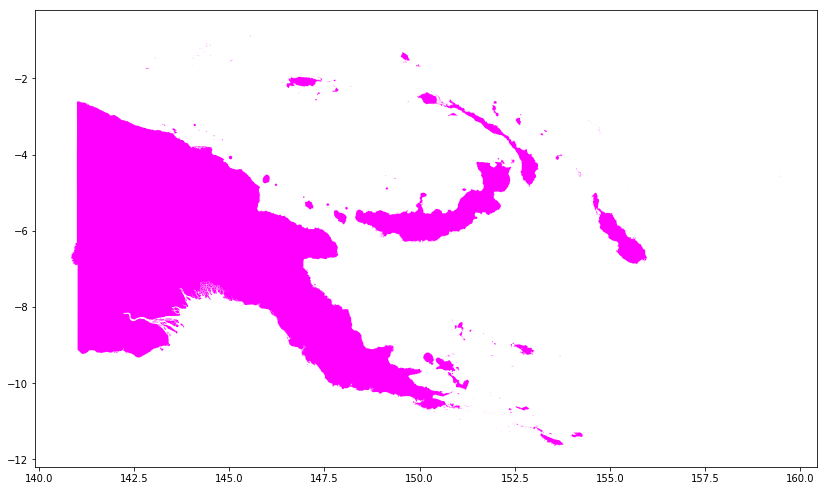

In [72]:
papua.plot(figsize=(14,10),color='magenta')

In [4]:
from geopandas.datasets import naturalearth_cities, naturalearth_lowres

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [75]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


### World Base Map and Continent Maps

In [ ]:
world_map  = world.plot(color='white', edgecolor='black')
na_map     = world[world.continent == 'North America'].plot(color='white', edgecolor='black')
sa_map     = world[world.continent == 'South America'].plot(color='white', edgecolor='black')
euro_map   = world[world.continent == 'Europe'].plot(color='white', edgecolor='black')
africa_map = world[world.continent == 'Africa'].plot(color='white', edgecolor='black')
asia_map   = world[world.continent == 'Asia'].plot(color='white', edgecolor='black')
antarctica = world[world.continent == 'Antarctica'].plot(color='white', edgecolor='black') 

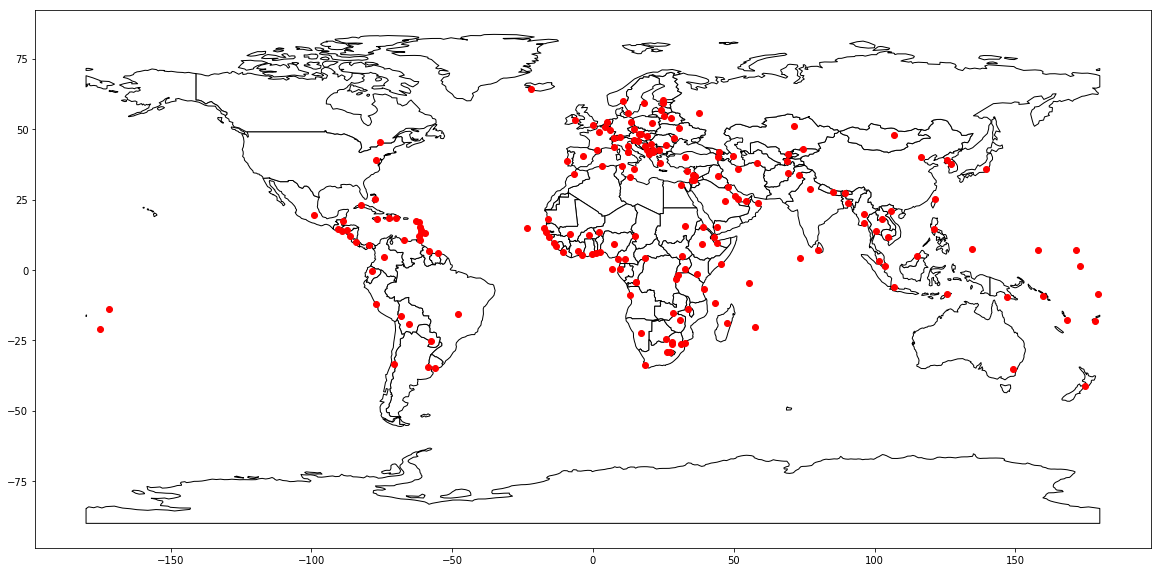

In [76]:
world_map  = world.plot(color='white', edgecolor='black', figsize=(20,15))
capitals.plot(ax=world_map, color='red');

In [6]:


point = Point(0.5, 0.5)
polygon = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(polygon.contains(point))
point = capitals.iloc[183][1]
polygon = world.iloc[0][5]
print(polygon.contains(point))

True
True


In [9]:
capitals['Continent'] = None

In [10]:
capitals['Country'] =  None

In [11]:
cols = capitals.columns.tolist()

In [12]:
cols = cols[-2:] + cols[:-2]

In [13]:
capitals = capitals[cols]

In [14]:
capitals.head()

,Continent,Country,name,geometry
0,None,None,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,None,None,San Marino,POINT (12.44177015780014 43.936095834768)
2,None,None,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,None,None,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,None,None,Palikir,POINT (158.1499743237623 6.916643696007725)


In [15]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [16]:
for i in range(len(world)):
    try:
        for j in range(len(capitals)):
            if world.iloc[i][5].contains(capitals.iloc[j][3]):
                capitals.iloc[j][0] = world.iloc[i][1]
            else:
                pass      
    except:
        print('searching')

In [17]:
for i in range(len(world)):
    try:
        for j in range(len(capitals)):
            if world.iloc[i][5].contains(capitals.iloc[j][3]):
                capitals.iloc[j][1] = world.iloc[i][2]
            else:
                pass      
    except:
        print('searching')

In [114]:
capitals.head()

,Continent,Country,name,geometry
0,Europe,Italy,Vatican City,POINT (12.45338654497177 41.90328217996012)
1,Europe,Italy,San Marino,POINT (12.44177015780014 43.936095834768)
2,Europe,Austria,Vaduz,POINT (9.516669472907267 47.13372377429357)
3,Europe,Luxembourg,Luxembourg,POINT (6.130002806227083 49.61166037912108)
4,None,None,Palikir,POINT (158.1499743237623 6.916643696007725)


In [2]:
endangered_lang = gpd.read_file('endangered_languages.csv')

In [88]:
endangered_lang

,number,SIL,name,alt_names,status,speakers,family,related,notes,notes_2,country,region,coord,geometry
0,3645,knw,!Xun,Ju; !Xun (Ekoka); Kung-Ekoka; !Kung; Ekoka-!Xû...,"Vulnerable (20 percent certain, based on the e...","14,000-18,000",Kx'a,"Southeastern !Xun, Northwestern !Xun, Central ...",,,South Africa;Namibia;Angola;,Africa,"-28.74358,23.983154; -17.560247, 18.050537; -1...",None
1,3956,bpk,Ôrôê,Orowe; Boewe; Neukaledonien;,"Endangered (20 percent certain, based on the e...",590,Austronesian; Malayo-Polynesian; Oceanic; New ...,,,,New Caledonia;,Pacific,"-21.4223,165.4678",None
2,1933,taa,(Lower) Tanana,,"Critically Endangered (80 percent certain, bas...",25,Athabaskan-Eyak-Tlingit; Dene (Athabaskan),Minto-Nenana; Salcha; Chena,,Tanana is the language of the Lower Tanana riv...,USA;,North America,"65.157778, -149.37;64.521111, -146.980556;64.5...",None
3,3581,aas,Aasáx,"Asax; Asá; Aasá; Assa; Asak; ""Ndorobo""; ""Dorob...",Dormant,0,Afro-Asiatic; Cushitic; South Cushitic,,,,Tanzania;,Africa,"-5.1948,37.738",None
4,2011,abg,Abaga,,"Critically Endangered (20 percent certain, bas...",5,Trans-New Guinea; Kainantu-Goroka,,,,Papua New Guinea;,Pacific,"-6.1883,145.5976",None
5,3584,abf,Abai Sungai,,"Endangered (20 percent certain, based on the e...",<500,Austronesian; Malayo-Polynesian; North Borneo;...,,,,Malaysia;,Southeast Asia,"5.587, 118.3695",None
6,10590,aau,Abau,Green River; Djarok,"Threatened (60 percent certain, based on the e...",">7,000",Sepik,Central; Down-River; Down-River Border; Up-River,,,Papua New Guinea;,Pacific,"-3.97, 141.32",None
7,1415,abq,Abaza,Abazintsy; Abazin; Ahuwa; Tapanta; Ashuwa;,"Vulnerable (20 percent certain, based on the e...","47,880",Northwest Caucasian; Abkhaz-Abaza,Ashkaraua; Tapanta;,Abaza belongs to the Abkhazo-Adyghian group of...,,Russia;,Caucasus;Europe;East Asia,"44.0,42.0",None
8,9669,abp,Abellen Ayta,Abenlen; Ayta Abenlen Sambal; Aburlin Negrito;...,"Threatened (20 percent certain, based on the e...","3,500",Austronesian; Malayo-Polynesian; Central Luzon,,,,Philippines;,Southeast Asia,,None
9,1763,bsa,Abinomn,"Avinomen; ""Baso""; Foya; Foja;","Critically Endangered (40 percent certain, bas...",50,Isolate; Pacific,,,,Indonesia;,Southeast Asia,"-2.92, 138.89",None


function adapted from [here](https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows)


In [91]:
import numpy as np

In [95]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx).assign(**{col:np.concatenate(df.loc[lens>0, col].values) for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [97]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [102]:
endangered_lang = tidy_split(endangered_lang, 'country', ';')

In [104]:
endangered_lang

,number,SIL,name,alt_names,status,speakers,family,related,notes,notes_2,country,region,coord,geometry
0,3645,knw,!Xun,Ju; !Xun (Ekoka); Kung-Ekoka; !Kung; Ekoka-!Xû...,"Vulnerable (20 percent certain, based on the e...","14,000-18,000",Kx'a,"Southeastern !Xun, Northwestern !Xun, Central ...",,,South Africa,Africa,"-28.74358,23.983154; -17.560247, 18.050537; -1...",None
0,3645,knw,!Xun,Ju; !Xun (Ekoka); Kung-Ekoka; !Kung; Ekoka-!Xû...,"Vulnerable (20 percent certain, based on the e...","14,000-18,000",Kx'a,"Southeastern !Xun, Northwestern !Xun, Central ...",,,Namibia,Africa,"-28.74358,23.983154; -17.560247, 18.050537; -1...",None
0,3645,knw,!Xun,Ju; !Xun (Ekoka); Kung-Ekoka; !Kung; Ekoka-!Xû...,"Vulnerable (20 percent certain, based on the e...","14,000-18,000",Kx'a,"Southeastern !Xun, Northwestern !Xun, Central ...",,,Angola,Africa,"-28.74358,23.983154; -17.560247, 18.050537; -1...",None
0,3645,knw,!Xun,Ju; !Xun (Ekoka); Kung-Ekoka; !Kung; Ekoka-!Xû...,"Vulnerable (20 percent certain, based on the e...","14,000-18,000",Kx'a,"Southeastern !Xun, Northwestern !Xun, Central ...",,,,Africa,"-28.74358,23.983154; -17.560247, 18.050537; -1...",None
1,3956,bpk,Ôrôê,Orowe; Boewe; Neukaledonien;,"Endangered (20 percent certain, based on the e...",590,Austronesian; Malayo-Polynesian; Oceanic; New ...,,,,New Caledonia,Pacific,"-21.4223,165.4678",None
1,3956,bpk,Ôrôê,Orowe; Boewe; Neukaledonien;,"Endangered (20 percent certain, based on the e...",590,Austronesian; Malayo-Polynesian; Oceanic; New ...,,,,,Pacific,"-21.4223,165.4678",None
2,1933,taa,(Lower) Tanana,,"Critically Endangered (80 percent certain, bas...",25,Athabaskan-Eyak-Tlingit; Dene (Athabaskan),Minto-Nenana; Salcha; Chena,,Tanana is the language of the Lower Tanana riv...,USA,North America,"65.157778, -149.37;64.521111, -146.980556;64.5...",None
2,1933,taa,(Lower) Tanana,,"Critically Endangered (80 percent certain, bas...",25,Athabaskan-Eyak-Tlingit; Dene (Athabaskan),Minto-Nenana; Salcha; Chena,,Tanana is the language of the Lower Tanana riv...,,North America,"65.157778, -149.37;64.521111, -146.980556;64.5...",None
3,3581,aas,Aasáx,"Asax; Asá; Aasá; Assa; Asak; ""Ndorobo""; ""Dorob...",Dormant,0,Afro-Asiatic; Cushitic; South Cushitic,,,,Tanzania,Africa,"-5.1948,37.738",None
3,3581,aas,Aasáx,"Asax; Asá; Aasá; Assa; Asak; ""Ndorobo""; ""Dorob...",Dormant,0,Afro-Asiatic; Cushitic; South Cushitic,,,,,Africa,"-5.1948,37.738",None


In [107]:
endangered_lang

KeyError: "['geometry'] not found in axis"

In [101]:
endangered_lang_original

In [85]:
many_country = [175, 291, 293, 544, 1596, 2690, 3110, 3223]
endangered_lang.drop(index=many_country)['country'].str.split(';', expand=True)

,0,1,2,3,4,5,6
0,SouthAfrica,Namibia,Angola,,None,None,None
1,NewCaledonia,,None,None,None,None,None
2,USA,,None,None,None,None,None
3,Tanzania,,None,None,None,None,None
4,PapuaNewGuinea,,None,None,None,None,None
5,Malaysia,,None,None,None,None,None
6,PapuaNewGuinea,,None,None,None,None,None
7,Russia,,None,None,None,None,None
8,Philippines,,None,None,None,None,None
9,Indonesia,,None,None,None,None,None


In [91]:
endangered_lang['coord'][0]

'-28.74358,23.983154; -17.560247, 18.050537; -19.621892, 20.253296; -21.749296, 19.896240'

In [3]:
endangered_lang['coord_primary'] = endangered_lang['coord'].str.split(';', expand=True)[0]

In [4]:
endangered_lang['lat'] = endangered_lang['coord_primary'].str.split(',', expand=True)[1]

In [5]:
endangered_lang['long'] = endangered_lang['coord_primary'].str.split(',', expand=True)[0]

In [6]:
endangered_lang['long'].fillna(value='Unknown',inplace=True)

In [7]:
endangered_lang['lat'].fillna(value='Unknown',inplace=True)

In [8]:
endangered_lang['lat'] = endangered_lang['lat'].str.replace(' ','')

In [9]:
endangered_lang['long'] = endangered_lang['long'].str.replace(' ','')

In [10]:
for i in range(len(endangered_lang)):
    if endangered_lang['long'][i]=='Unknown':
        endangered_lang['long'][i] = endangered_lang['long'][i]
    elif endangered_lang['lat'][i]=='Unknown':
        endangered_lang['lat'][i] = endangered_lang['lat'][i]
    else:
        lat = float(endangered_lang['lat'][i])
        long = float(endangered_lang['long'][i])
        endangered_lang['geometry'][i] = tuple((lat, long))

In [13]:
for i in range(len(endangered_lang)):
    if endangered_lang['long'][i]=='Unknown':
        endangered_lang['long'][i] = endangered_lang['long'][i]
    elif endangered_lang['lat'][i]=='Unknown':
        endangered_lang['lat'][i] = endangered_lang['lat'][i]
    else:
        endangered_lang['geometry'][i] = Point(endangered_lang['geometry'][i])

In [17]:
endangered_lang.to_file('endangered.shp')

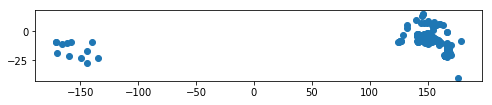

In [101]:
endangered_lang[endangered_lang['region']=='Pacific'].plot(figsize=(8,12))

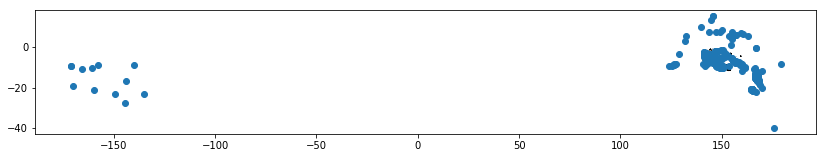

In [102]:
papua_base = papua.plot(color='white', edgecolor='black', figsize=(14,10))
endangered_lang[endangered_lang['region']=='Pacific'].plot(ax=papua_base)

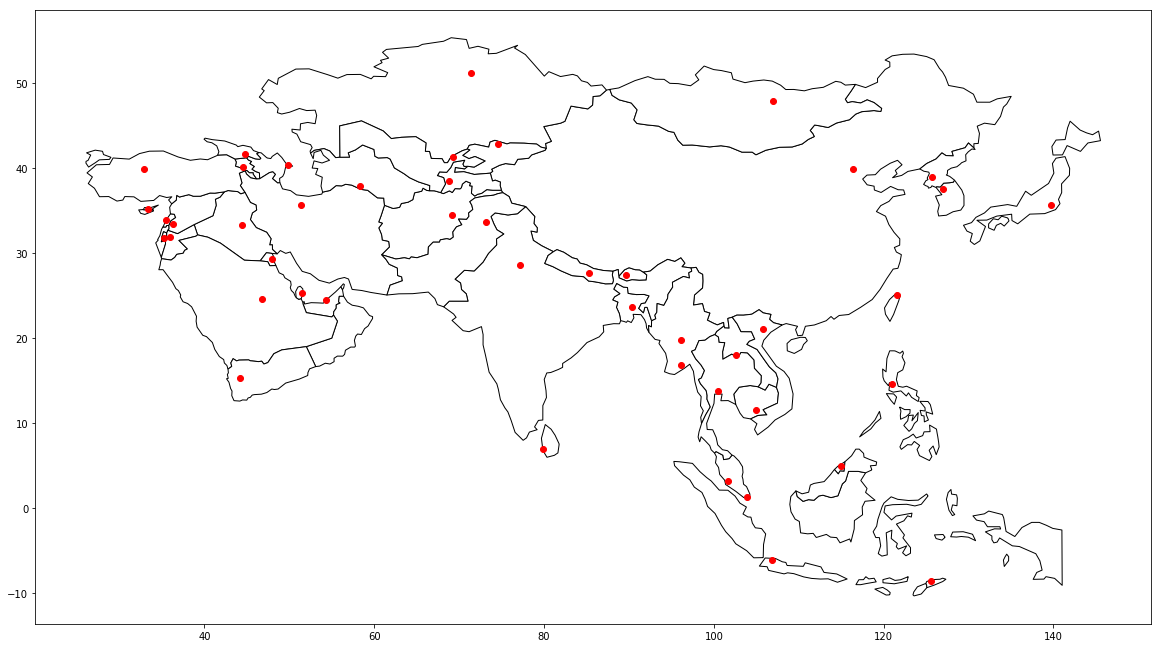

In [115]:
asia_map = world[world.continent == 'Asia'].plot(color='white', edgecolor='black', figsize=(20,15))
capitals[capitals['Continent']=='Asia'].plot(ax=asia_map, color='red');

In [117]:
lang_qual = pd.read_csv('Parameters.csv')

In [120]:
lang_qual.shape

(192, 10)

In [20]:
wals_lang = gpd.read_file('wals_languages.csv')

In [21]:
wals_lang.head()

,ascii_name,description,genus_pk,id,iso_codes,jsondata,latitude,longitude,macroarea,markup_description,name,pk,samples_100,samples_200,geometry
0,aari,,9,aar,aiw,{},6.0,36.5833333333,Africa,,Aari,1668,False,False,None
1,abau,,367,aba,aau,{},-4.0,141.25,Papunesia,,Abau,968,False,False,None
2,abaza,,325,abz,abq,{},44.0,42.0,Eurasia,,Abaza,908,False,False,None
3,abenaki (western),,17,abw,abe,{},44.0,-72.25,North America,,Abenaki (Western),267,False,False,None
4,abidji,,275,abd,abi,{},5.66666666667,-4.58333333333,Africa,,Abidji,628,False,False,None


In [25]:
for i in range(len(wals_lang)):
    wals_lang['geometry'][i] = tuple((float(wals_lang.longitude[i]), float(wals_lang.latitude[i])))
wals_lang['geometry'] = wals_lang['geometry'].apply(Point)

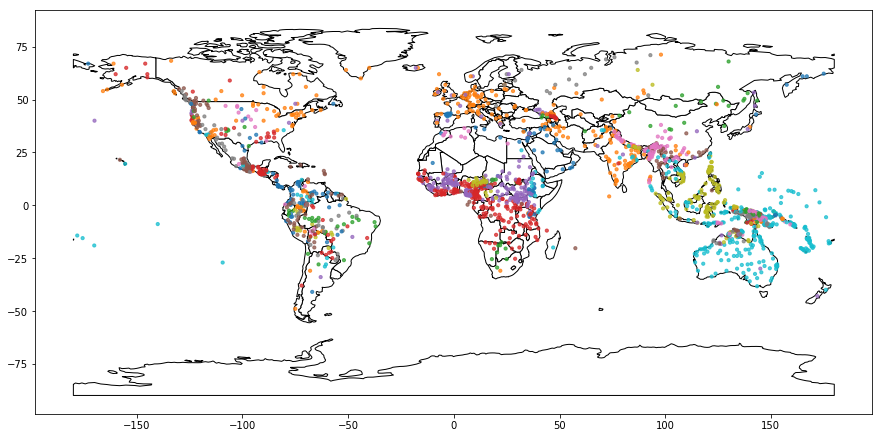

In [124]:
world_map  = world.plot(color='white', edgecolor='black',figsize=(15,10))
wals_lang.plot(ax=world_map, column='genus_pk', alpha=.75, markersize=10)

In [125]:
wals_lang.shape

(2000, 15)

In [22]:
full_lang = gpd.read_file('wals_language.csv/language.csv')

In [23]:
for i in range(len(full_lang)):
    full_lang['geometry'][i] = tuple((float(full_lang.longitude[i]), float(full_lang.latitude[i])))

In [24]:
full_lang['geometry'] = full_lang['geometry'].apply(Point)

In [129]:
list(full_lang.columns)

['wals_code',
 'iso_code',
 'glottocode',
 'Name',
 'latitude',
 'longitude',
 'genus',
 'family',
 'macroarea',
 'countrycodes',
 '1A Consonant Inventories',
 '2A Vowel Quality Inventories',
 '3A Consonant-Vowel Ratio',
 '4A Voicing in Plosives and Fricatives',
 '5A Voicing and Gaps in Plosive Systems',
 '6A Uvular Consonants',
 '7A Glottalized Consonants',
 '8A Lateral Consonants',
 '9A The Velar Nasal',
 '10A Vowel Nasalization',
 '11A Front Rounded Vowels',
 '12A Syllable Structure',
 '13A Tone',
 '14A Fixed Stress Locations',
 '15A Weight-Sensitive Stress',
 '16A Weight Factors in Weight-Sensitive Stress Systems',
 '17A Rhythm Types',
 '18A Absence of Common Consonants',
 '19A Presence of Uncommon Consonants',
 '20A Fusion of Selected Inflectional Formatives',
 '21A Exponence of Selected Inflectional Formatives',
 '22A Inflectional Synthesis of the Verb',
 '23A Locus of Marking in the Clause',
 '24A Locus of Marking in Possessive Noun Phrases',
 '25A Locus of Marking: Whole-langua

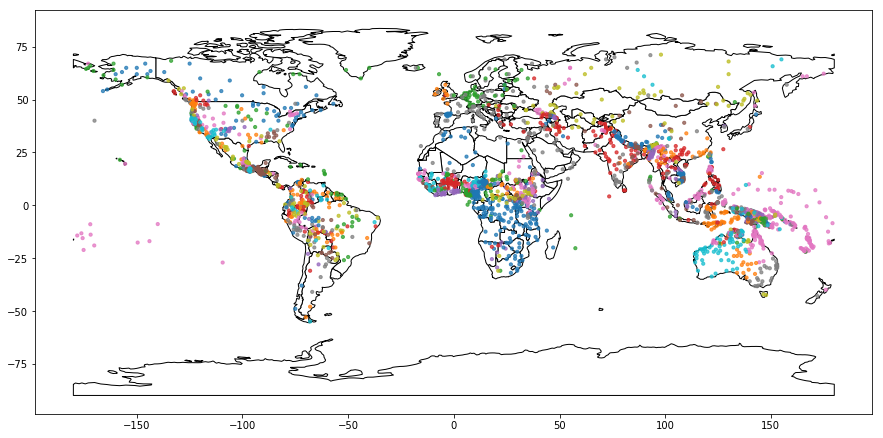

In [131]:
world_map  = world.plot(color='white', edgecolor='black',figsize=(15,10))
full_lang.plot(ax=world_map, column='genus',alpha=.75, markersize=10)

In [132]:
for i in range(len(full_lang)):
    full_lang['latitude'][i] = float(full_lang['latitude'][i])
    full_lang['longitude'][i] = float(full_lang['longitude'][i])

In [133]:
full_lang[full_lang['macroarea'] == 'Papunesia']

,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives,geometry
2,aba,aau,abau1245,Abau,-4,141.25,Upper Sepik,Sepik,Papunesia,PG,...,,,,,,,,,,POINT (141.25 -4)
12,abu,kgr,abun1252,Abun,-0.5,132.5,North-Central Bird's Head,West Papuan,Papunesia,ID,...,,,,,,,,,,POINT (132.5 -0.5)
13,abv,abz,abui1241,Abui,-8.25,124.667,Greater Alor,Timor-Alor-Pantar,Papunesia,ID,...,,,,,,,,,,POINT (124.666666667 -8.25)
26,adg,adn,adan1251,Adang,-8.2,124,Greater Alor,Timor-Alor-Pantar,Papunesia,ID,...,,,,,,,,,,POINT (124 -8.199999999999999)
32,adz,adz,adze1240,Adzera,-6.25,146.25,Oceanic,Austronesian,Papunesia,PG,...,,,,,,,,,,POINT (146.25 -6.25)
37,aga,agd,agar1252,Agarabi,-6.16667,146,Eastern Highlands,Trans-New Guinea,Papunesia,PG,...,,,,,,,,,,POINT (146 -6.16666666667)
39,agc,agt,cent2084,Agta (Central),17.9667,121.833,Greater Central Philippine,Austronesian,Papunesia,PH,...,,,,,,,,,,POINT (121.833333333 17.9666666667)
40,agd,duo,dupa1235,Agta (Dupaningan),18,122.083,Greater Central Philippine,Austronesian,Papunesia,PH,...,,,,,,,,,,POINT (122.083333333 18)
52,ahu,ahh,aghu1255,Aghu,-6.16667,140.167,Awju-Dumut,Trans-New Guinea,Papunesia,ID,...,,,,,,,,,,POINT (140.166666667 -6.16666666667)
58,aji,aji,ajie1238,Ajië,-21.3333,165.5,Oceanic,Austronesian,Papunesia,NC,...,,,,,,,,,,POINT (165.5 -21.3333333333)


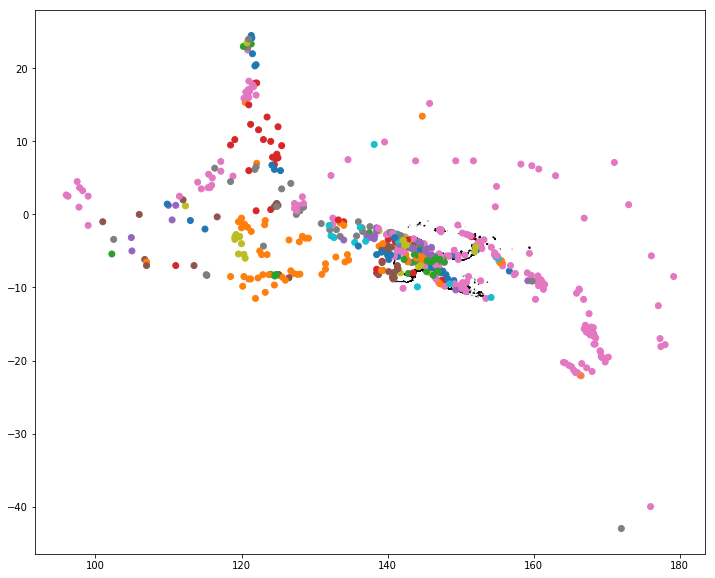

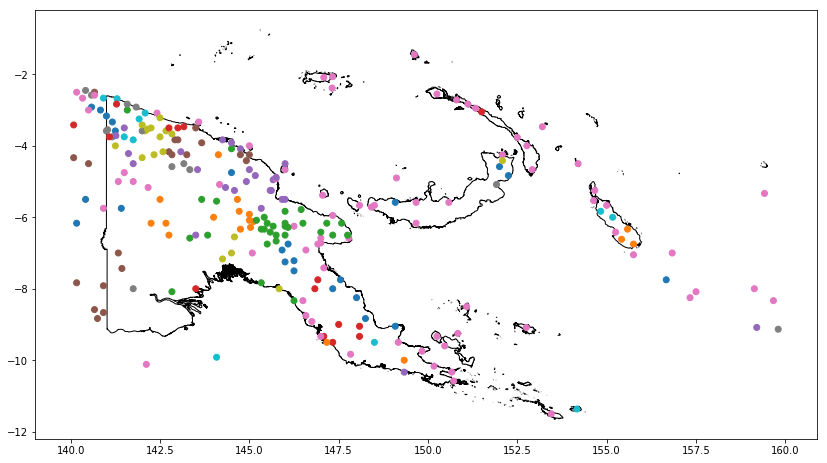

In [135]:
papua_base = papua.plot(color='white', edgecolor='black', figsize=(14,10))
full_lang[(full_lang['macroarea'] == 'Papunesia') & 
          (full_lang['longitude'] > 140) &
          (full_lang['longitude'] < 160) &
          (full_lang['latitude'] > -12) &
          (full_lang['latitude'] < 0)
         ].plot(ax=papua_base, column='genus')

In [136]:
biodiversity = gpd.read_file('resource.csv')

In [137]:
biodiversity.columns

Index(['_id', 'Biome', 'Block', 'Country', 'Country_distance_metres',
       'Diversity_metric', 'Diversity_metric_is_effort_sensitive',
       'Diversity_metric_is_suitable_for_Chao', 'Diversity_metric_type',
       'Diversity_metric_unit', 'Ecoregion', 'Ecoregion_distance_metres',
       'Fragmentation_layout', 'Habitat_as_described',
       'Habitat_patch_area_square_metres', 'Higher_taxa', 'Hotspot',
       'Km_to_nearest_edge_of_habitat', 'Latitude', 'Longitude',
       'Max_linear_extent_metres', 'N_samples', 'Predominant_habitat',
       'Rank_of_study_common_taxon', 'Realm', 'Reference', 'SS', 'SSB', 'SSBS',
       'SSS', 'Sample_date_resolution', 'Sample_end_latest',
       'Sample_start_earliest', 'Sampling_effort', 'Sampling_effort_unit',
       'Sampling_method', 'Site_name', 'Site_number', 'Source_ID',
       'Source_for_predominant_habitat', 'Study_common_taxon', 'Study_name',
       'Study_number', 'Transect_details', 'UN_region', 'UN_subregion',
       'Use_intensity', 

In [138]:
biodiversity.head().T

,0,1,2,3,4
_id,1,2,3,4,5
Biome,Temperate Broadleaf & Mixed Forests,Temperate Broadleaf & Mixed Forests,Temperate Broadleaf & Mixed Forests,Temperate Broadleaf & Mixed Forests,Temperate Broadleaf & Mixed Forests
Block,1,1,2,2,3
Country,Argentina,Argentina,Argentina,Argentina,Argentina
Country_distance_metres,0,0,0,0,0
Diversity_metric,abundance,abundance,abundance,abundance,abundance
Diversity_metric_is_effort_sensitive,TRUE,TRUE,TRUE,TRUE,TRUE
Diversity_metric_is_suitable_for_Chao,TRUE,TRUE,TRUE,TRUE,TRUE
Diversity_metric_type,Abundance,Abundance,Abundance,Abundance,Abundance
Diversity_metric_unit,individuals,individuals,individuals,individuals,individuals


In [139]:
for i in range(len(full_lang)):
    biodiversity['geometry'][i] = tuple((float(biodiversity.Longitude[i]), float(biodiversity.Latitude[i])))

In [140]:
for i in range(len(biodiversity)):
    try:
        biodiversity['geometry'][i] = Point(biodiversity['geometry'][i])
    except:
        pass

In [141]:
biodiversity.head()

,_id,Biome,Block,Country,Country_distance_metres,Diversity_metric,Diversity_metric_is_effort_sensitive,Diversity_metric_is_suitable_for_Chao,Diversity_metric_type,Diversity_metric_unit,...,Source_for_predominant_habitat,Study_common_taxon,Study_name,Study_number,Transect_details,UN_region,UN_subregion,Use_intensity,Years_since_fragmentation_or_conversion,geometry
0,1,Temperate Broadleaf & Mixed Forests,1,Argentina,0,abundance,TRUE,TRUE,Abundance,individuals,...,Direct from publication / author,Animalia,Vasquez_inverts,1,,Americas,South America,Minimal use,,POINT (-71.5347222222 -41.0455555556)
1,2,Temperate Broadleaf & Mixed Forests,1,Argentina,0,abundance,TRUE,TRUE,Abundance,individuals,...,Direct from publication / author,Animalia,Vasquez_inverts,1,,Americas,South America,Light use,,POINT (-71.5544444444 -41.0825)
2,3,Temperate Broadleaf & Mixed Forests,2,Argentina,0,abundance,TRUE,TRUE,Abundance,individuals,...,Direct from publication / author,Animalia,Vasquez_inverts,1,,Americas,South America,Minimal use,,POINT (-71.5125 -41.075)
3,4,Temperate Broadleaf & Mixed Forests,2,Argentina,0,abundance,TRUE,TRUE,Abundance,individuals,...,Direct from publication / author,Animalia,Vasquez_inverts,1,,Americas,South America,Light use,,POINT (-71.5175 -41.0988888889)
4,5,Temperate Broadleaf & Mixed Forests,3,Argentina,0,abundance,TRUE,TRUE,Abundance,individuals,...,Direct from publication / author,Animalia,Vasquez_inverts,1,,Americas,South America,Minimal use,,POINT (-71.5052777778 -41.3461111111)


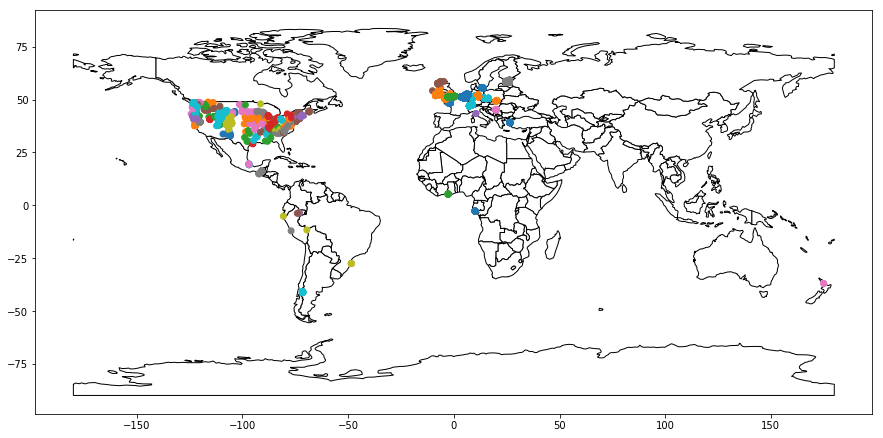

In [142]:
world_map  = world.plot(color='white', edgecolor='black',figsize=(15,10))
biodiversity[biodiversity['geometry']!=None].plot(ax=world_map, column='Ecoregion', categorical=True)

In [ ]:
country_joshua = gpd.read_file('AllCountries_Joshua.csv')

In [ ]:
language_joshua = gpd.read_file('AllLanguageListing_Joshua.csv')

In [ ]:
peoples_joshua = gpd.read_file('AllPeoplesByCountry_Joshua.csv')

In [ ]:
peoples_joshua = peoples_joshua[peoples_joshua.columns[:34]]

In [ ]:
peoples_joshua.columns

In [ ]:
type(peoples_joshua['Latitude'][0])

In [ ]:
peoples_joshua['geometry'] = 0

In [ ]:
peoples_joshua.head()

In [ ]:

for i in range(len(peoples_joshua)):
    x = float(peoples_joshua.Longitude[i])
    y = float(peoples_joshua.Latitude[i])
    peoples_joshua['geometry'][i]  = tuple((x,y))

In [ ]:
world_map  = world.plot(color='white', edgecolor='black',figsize=(15,10))
# peoples_joshua.plot(column='Population',ax=world_map, cmap='coolwarm')

In [ ]:
biodiversity.shape

In [26]:
africa_pop = gpd.read_file('africa_uscensus.csv')

In [27]:
africa_pop_future = gpd.read_file('africa_uscensus_2020-2034 - census_data_20190420_5cbb2c59c7bde.csv')

In [ ]:
africa_pop_future.head()

In [ ]:
for i in range(len(africa_pop_future)):
    africa_pop.iloc[i+len(africa_pop)] = africa_pop_future.iloc[i]

In [ ]:
kenya_alt = gpd.read_file('kenya-adm2-uscb-jul15/')

In [ ]:
kenya_alt.head()

In [ ]:
peoples_joshua[peoples_joshua['Ctry']=='Kenya']

In [ ]:
kenya_base = kenya_alt.plot(color='white', edgecolor='black',figsize=(12,10))
peoples_joshua[peoples_joshua['Ctry']=='Kenya'].plot(column='Population',ax=kenya_base, cmap='coolwarm')

In [66]:
UN_pop_stats = gpd.read_file('SYB61_T02_PopulationSADensity.csv')

In [ ]:
UN_pop_stats.columns

In [ ]:
UN_pop_stats[UN_pop_stats['Region/Country/Area']=='Kenya']

In [ ]:
gpd.read_file('Languages_glottolog.csv').tail()

In [ ]:
gpd.read_file('PapunesiaAustro_glottolog.csv').tail()

In [ ]:
# gpd.read_file('WildfinderUpdate.mdb')

In [159]:
primate_subset = gpd.read_file('0003908-190415153152247.csv')

In [160]:
primate_subset.columns

Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'countryCode', 'locality',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue', 'geometry'],
      dtype='object')

In [161]:
primate_subset['decimalLatitude'] = primate_subset['decimalLatitude'].astype(float)
primate_subset['decimalLongitude'] = primate_subset['decimalLongitude'].astype(float)

In [167]:
for i in range(len(primate_subset)):
    primate_subset['geometry'][i] = tuple((primate_subset.decimalLongitude[i], primate_subset.decimalLatitude[i]))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [168]:
primate_subset['geometry'] = primate_subset['geometry'].apply(Point)

In [169]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [171]:
primate_subset

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue,geometry
0,2236893127,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22549992,Animalia,Chordata,Mammalia,Primates,Cercopithecidae,Colobus,Colobus angolensis,...,2019-04-16T09:07:10Z,CC_BY_NC_4_0,Joshua Rains,Joshua Rains,,,2019-04-24T08:25:15.996Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (39.582727 -4.29903)
1,2236868237,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22454896,Animalia,Chordata,Mammalia,Artiodactyla,Bovidae,Aepyceros,Aepyceros melampus,...,2019-04-14T08:12:12Z,CC_BY_NC_4_0,Kiko Janneman,Kiko Janneman,,,2019-04-24T08:25:00.960Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (37.241569 -1.863585)
2,2236868219,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22455209,Animalia,Chordata,Mammalia,Rodentia,Sciuridae,Xerus,,...,2019-04-14T08:34:05Z,CC_BY_NC_4_0,Kiko Janneman,Kiko Janneman,,,2019-04-24T08:25:01.225Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;TAXON_MATCH_HIGHE...,POINT (37.243441 -1.872126)
3,2236867951,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22456986,Animalia,Chordata,Mammalia,Rodentia,Muridae,Rhabdomys,Rhabdomys pumilio,...,2019-04-14T10:18:10Z,CC_BY_NC_4_0,rjq,rjq,,,2019-04-24T08:25:00.599Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (37.290073 -0.048235)
4,2236865908,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22450242,Animalia,Chordata,Mammalia,Artiodactyla,Bovidae,Alcelaphus,Alcelaphus buselaphus,...,2019-04-14T04:32:13Z,CC_BY_NC_4_0,rosamaria18,rosamaria18,,,2019-04-24T08:24:59.921Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (36.862514 -1.365542)
5,2236852280,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22397958,Animalia,Chordata,Mammalia,Carnivora,Canidae,Canis,Canis mesomelas,...,2019-04-13T03:45:28Z,CC_BY_NC_4_0,Kiko Janneman,Kiko Janneman,,,2019-04-24T08:24:47.884Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (37.241273 -1.873439)
6,2236849703,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22392689,Animalia,Chordata,Mammalia,Artiodactyla,Hippopotamidae,Hippopotamus,Hippopotamus amphibius,...,2019-04-13T00:58:38Z,CC_BY_NC_4_0,owlice,owlice,,,2019-04-24T08:24:45.720Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (35.112263 -1.452545)
7,2236849637,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22390312,Animalia,Chordata,Mammalia,Proboscidea,Elephantidae,Loxodonta,Loxodonta africana,...,2019-04-12T23:45:27Z,CC_BY_NC_4_0,owlice,owlice,,,2019-04-24T08:24:44.231Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (37.354159 -2.664359)
8,2236846118,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22374982,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera leo,...,2019-04-12T17:11:30Z,CC_BY_NC_4_0,owlice,owlice,,,2019-04-24T08:24:42.163Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (37.214114 -2.764624)
9,2236845377,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/22374493,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera leo,...,2019-04-12T16:58:56Z,CC_BY_NC_4_0,owlice,owlice,,,2019-04-24T08:24:40.216Z,STILLIMAGE,GEODETIC_DATUM_ASSUMED_WGS84;COORDINATE_ROUNDED,POINT (37.355113 -2.797732)


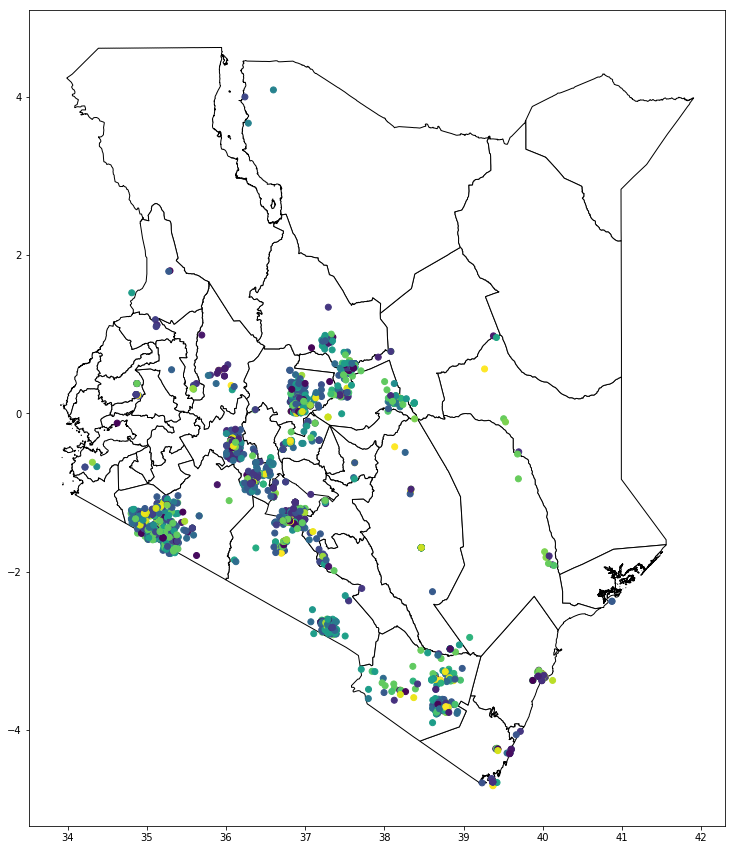

In [174]:
kenya_map = kenya.plot(color='white', edgecolor='black', figsize=(20,15))
primate_subset.plot(ax=kenya_map, column='genus', categorical=True, cmap='viridis');
wals_lang['']

In [ ]:
gpd.read_file('amano_tab1.csv').head()

In [ ]:
gpd.read_file('amano_tab2.csv').head()

In [ ]:
gpd.read_file('amano_tab3.csv').head()

In [ ]:
gpd.read_file('amano_tab4.csv').head()

In [40]:
from bokeh.plotting import figure, save, show
from bokeh.models import ColumnDataSource, HoverTool, LogColorMapper
import pysal as ps

/anaconda3/lib/python3.6/site-packages/pysal/model/spvcm/abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [41]:
# Let's first do some coloring magic that converts the color palet into map numbers (it's okey not to understand)
from bokeh.palettes import RdYlBu11, Spectral6
from bokeh.models import LogColorMapper
from bokeh.transform import linear_cmap

In [ ]:
test_bokeh = figure(title="My first interactive plot!")

# Create a list of x-coordinates
x_coords = [0,1,2,3,4]

# Create a list of y-coordinates
y_coords = [5,4,1,2,0]

test_bokeh.circle(x=x_coords, y=y_coords, size=10, color="red")

show(test_bokeh)

In [ ]:
# Save the plot by passing the plot -object and output path
save(obj=test_bokeh, filename='points.html')

In [28]:
wals_africa = wals_lang[wals_lang['macroarea'] == 'Africa']

In [29]:
def getPointCoords(row, geom, coord_type):
    """Calculates coordinates ('x' or 'y') of a Point geometry"""
    if coord_type == 'x':
        return row[geom].x
    elif coord_type == 'y':
        return row[geom].y

In [30]:
wals_africa['x'] = wals_africa.apply(getPointCoords, geom='geometry', coord_type='x', axis=1)
wals_africa['y'] = wals_africa.apply(getPointCoords, geom='geometry', coord_type='y', axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
wals_africa['latitude'] = wals_africa['latitude'].map(lambda x: float(x))
wals_africa['longitude'] = wals_africa['longitude'].map(lambda x: float(x))

In [31]:
africa_map = world[world['continent'] == 'Africa']

In [32]:
africa_map['geometry'][1] = africa_map['geometry'][1][0]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [33]:
def getPolyCoords(row, geom, coord_type):
    """Returns the coordinates ('x' or 'y') of edges of a Polygon exterior"""

    # Parse the exterior of the coordinate
    exterior = row[geom].exterior

    if coord_type == 'x':
        # Get the x coordinates of the exterior
        return list( exterior.coords.xy[0] )
    elif coord_type == 'y':
        # Get the y coordinates of the exterior
        return list( exterior.coords.xy[1] )

In [34]:
# Get the Polygon x and y coordinates
africa_map['x'] = africa_map.apply(getPolyCoords, geom='geometry', coord_type='x', axis=1)
africa_map['y'] = africa_map.apply(getPolyCoords, geom='geometry', coord_type='y', axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
pointsource = ColumnDataSource(wals_africa.drop(columns='geometry'))
mapsource = ColumnDataSource(africa_map.drop(columns='geometry'))

afromap = figure(plot_width=500, plot_height=500, title="Africa Languages")

base = afromap.patches('x', 'y', source=mapsource,
                fill_color=linear_cmap('pop_est', 'Blues8', 
                                       min(africa_map['pop_est']), 
                                       max(africa_map['pop_est'])),
                fill_alpha=1.0, 
                line_color="black", 
                line_width=0.05)

# Add points on top (as black points)
points = afromap.circle('x', 'y', size=3, source=pointsource, color="black", line_color='white')

# Save the figure
# save(obj=afromap, filename='africa_language_map.html')

In [43]:
base_hover = HoverTool(renderers=[base])
piont_hover = HoverTool(renderers=[points])

In [45]:
base_hover.tooltips = [('Name','@name'),
                       ('Population', '@pop_est'),
                       ('GDP', '@gdp_md_est'),
                    ]

piont_hover.tooltips = [('Name', '@name')
                    ]

In [48]:
afromap.add_tools(base_hover, piont_hover)

In [49]:
show(afromap)

In [35]:
UN_pop_stats[UN_pop_stats['Region/Country/Area']=='Kenya']

NameError: name 'UN_pop_stats' is not defined